<a href="https://colab.research.google.com/github/mittushaji25/employee-attrition-analysis/blob/main/notebook/employee_attrition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Employee Attrition Analysis: Model Interpretation & Business Insights**

## Overview

This notebook focuses on interpreting the results of a machine learning model trained to predict employee attrition based on HR analytics data.

We evaluate:
- Model performance metrics
- Feature importance
- Key drivers of attrition
- Actionable business insights


## ETL (Extract, Transform, Load)

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/IBM HR Analytics Employee Attrition.csv', sep=';')


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"{col}:\n{df[col].value_counts(dropna=False)}\n")

Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married   

In [ ]:
# Trim whitespace for all object columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

# Check unique values again for BusinessTravel
print(df['BusinessTravel'].unique())

In [ ]:
def check_rare_categories(col, threshold=0.05):
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < threshold]
    print(f"Rare categories in '{col}':\n{rare}\n")

check_rare_categories('JobRole')
check_rare_categories('EducationField')


Rare categories in 'JobRole':
JobRole
Human Resources    0.035374
Name: proportion, dtype: float64

Rare categories in 'EducationField':
EducationField
Human Resources    0.018367
Name: proportion, dtype: float64



## EDA (Exploratory Data Analysis)

### Summary Statistics

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


### Attrition Distribution

/tmp/ipython-input-24-3750276047.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


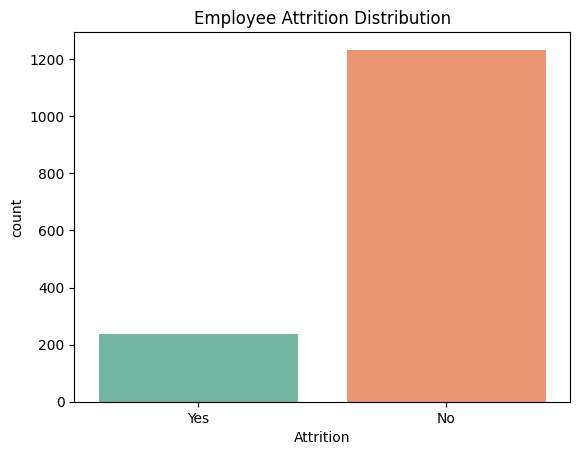

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Distribution')
plt.show()

### Demographics and Attrition

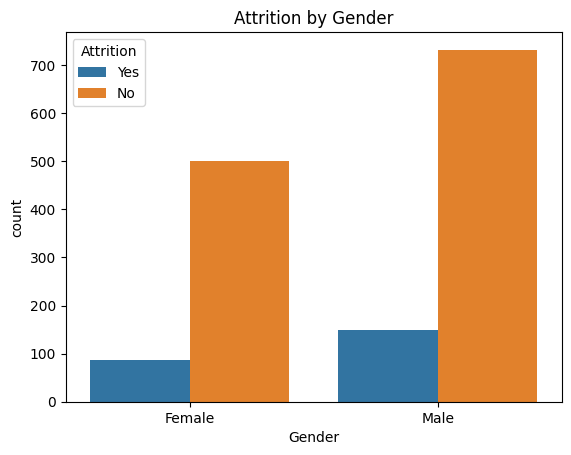

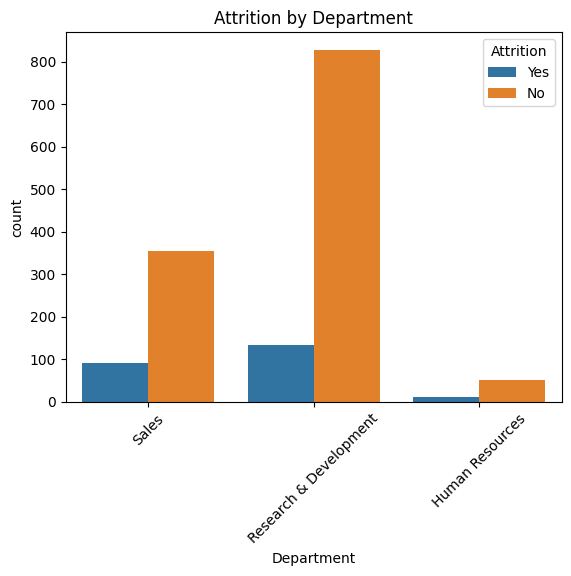

In [ ]:
# Attrition by Gender
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


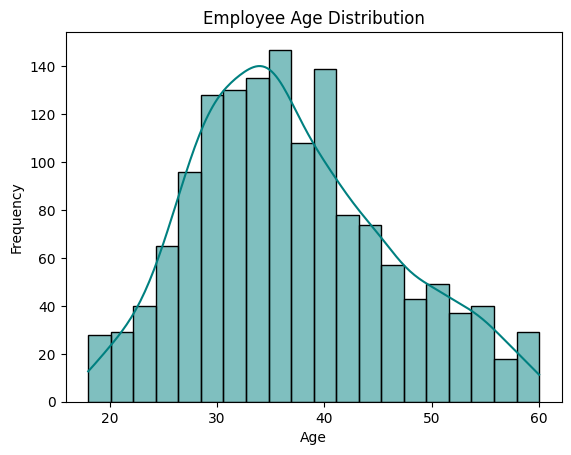

In [ ]:
# Age distribution across employees
sns.histplot(data=df, x='Age', bins=20, kde=True, color='teal')
plt.title('Employee Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-27-2625656017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='viridis')


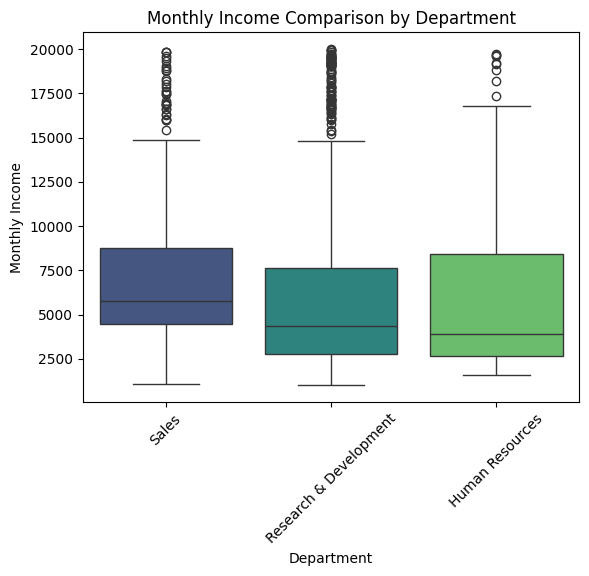

In [ ]:
# Monthly income across departments
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income Comparison by Department')
plt.xticks(rotation=45)
plt.ylabel('Monthly Income')
plt.xlabel('Department')
plt.show()


### Job-Related Attributes

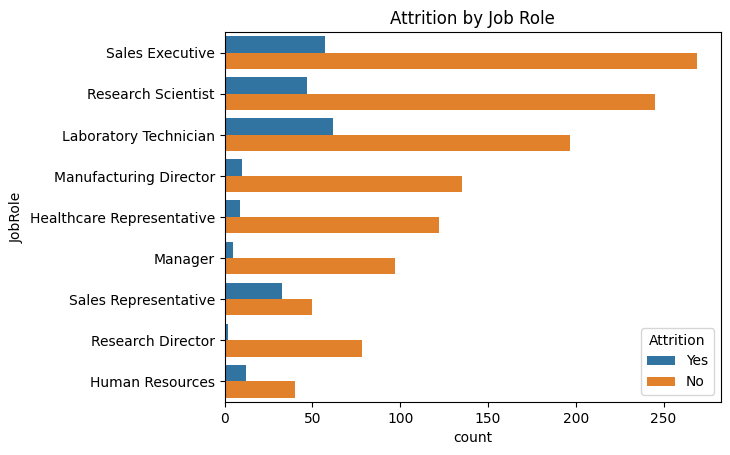

In [ ]:
# JobRole vs Attrition
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.show()

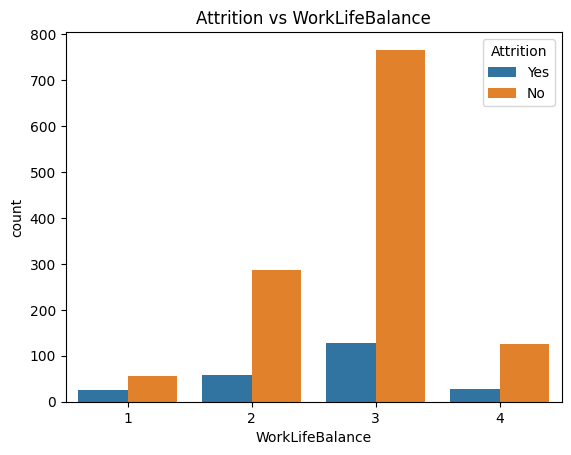

In [ ]:
# WorkLifeBalance Impact
sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition')
plt.title('Attrition vs WorkLifeBalance')
plt.show()


### Correlation Heatmap

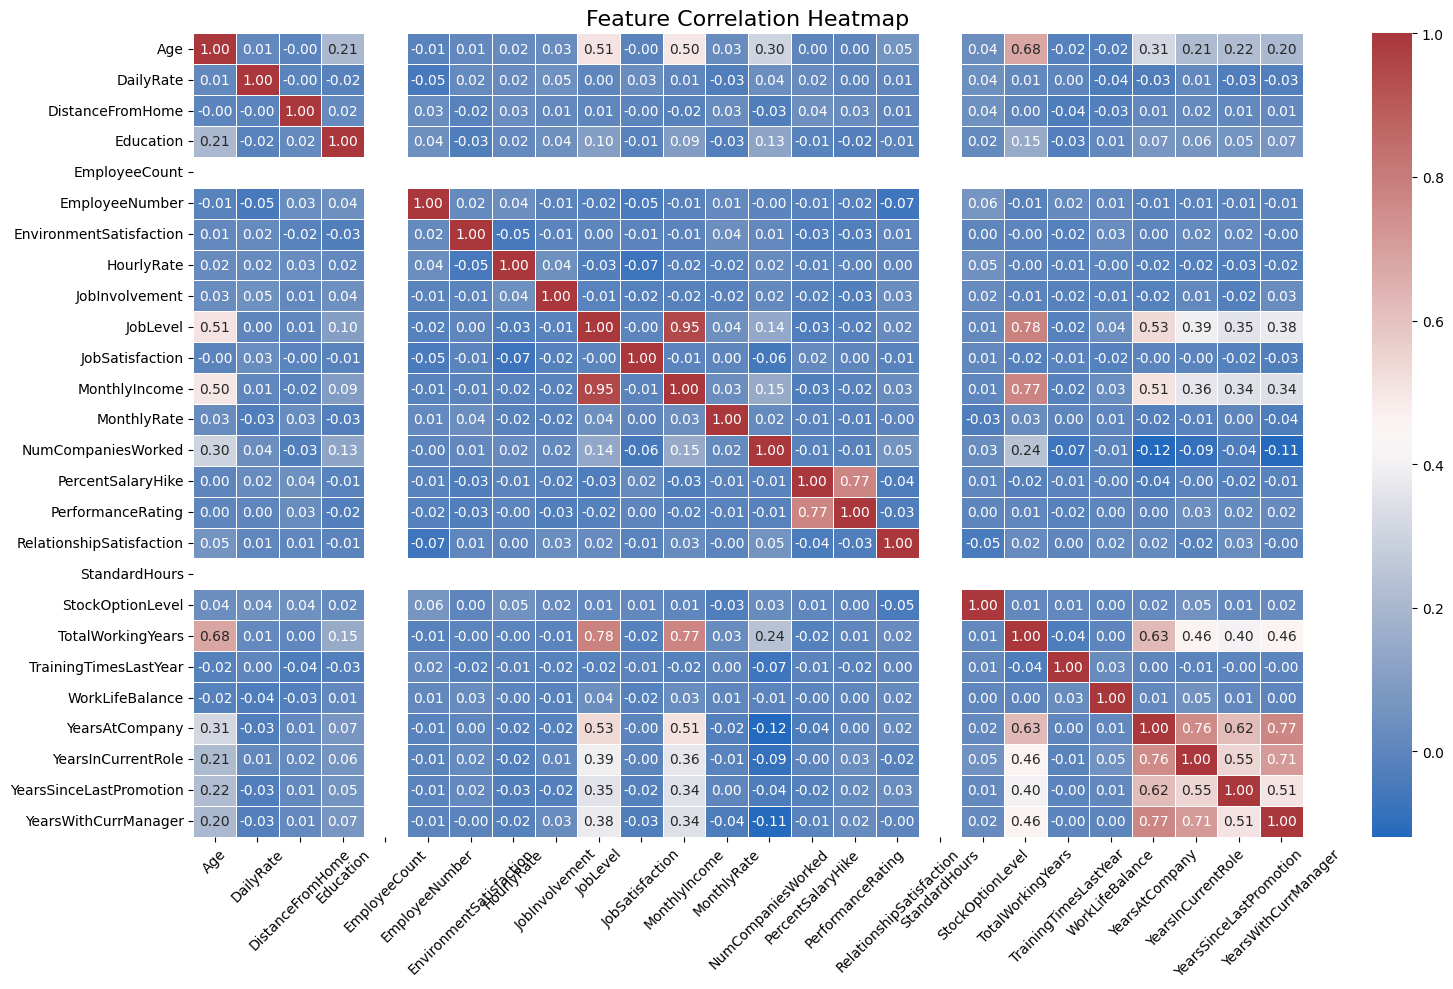

In [ ]:
plt.figure(figsize=(16, 10))

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Feature Engineering

In [ ]:
df['IncomePerYear'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)
df['TenureBucket'] = pd.cut(df['YearsAtCompany'], bins=[0,3,6,100], labels=['Junior','Mid','Senior'])
df['SatisfactionAverage'] = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']].mean(axis=1)
df['JobLevelLabel'] = df['JobLevel'].map({1: 'Entry', 2: 'Mid', 3: 'Senior', 4: 'Executive', 5: 'Director'})
df['PerformanceScaled'] = (df['PerformanceRating'] - df['PerformanceRating'].min()) / (df['PerformanceRating'].max() - df['PerformanceRating'].min())

In [ ]:
df['BusinessTravel_Encoded'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})
df['OverTime_Binary'] = df['OverTime'].map({'No': 0, 'Yes': 1})
df['DepartmentGroup'] = df['Department'].replace({
    'Human Resources': 'Other',
    'Sales': 'Sales',
    'Research & Development': 'R&D'
})

In [ ]:
jobrole_dummies = pd.get_dummies(df['JobRole'], prefix='JobRole')
df = pd.concat([df, jobrole_dummies], axis=1)

In [ ]:
df['LoyaltyScore'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
df['JobHopIndex'] = df['NumCompaniesWorked'] / (df['TotalWorkingYears'] + 1)
df['PromotionGap'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1)
df['TrainingIntensity'] = df['TrainingTimesLastYear'] / (df['YearsAtCompany'] + 1)
df['WorkPressureIndex'] = df['OverTime_Binary'] * df['PerformanceRating']

In [ ]:
role_income = df.groupby('JobRole')['MonthlyIncome'].transform('mean')
df['IncomeDeviationFromRoleMean'] = df['MonthlyIncome'] - role_income

In [ ]:
research_roles = ['Research Scientist', 'Laboratory Technician']
df['EducationMatchScore'] = df.apply(lambda row: 1 if row['EducationField'] == 'Life Sciences' and row['JobRole'] in research_roles else 0, axis=1)

In [ ]:
df['EngagementScore'] = df['JobInvolvement'] + df['JobSatisfaction'] + df['EnvironmentSatisfaction']

### Correlation with Target (Attrition)

In [ ]:
# Convert Attrition to binary
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Correlation
corr = df.corr(numeric_only=True)
corr_with_target = corr['Attrition_Flag'].sort_values(ascending=False)
print(corr_with_target)


Attrition_Flag                       1.000000
WorkPressureIndex                    0.247947
OverTime_Binary                      0.246118
JobHopIndex                          0.199986
JobRole_Sales Representative         0.157234
TrainingIntensity                    0.132908
BusinessTravel_Encoded               0.127006
JobRole_Laboratory Technician        0.098290
DistanceFromHome                     0.077924
EducationMatchScore                  0.050907
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PromotionGap                         0.010412
PerformanceRating                    0.002889
PerformanceScaled                    0.002889
JobRole_Research Scientist          -0.000360
IncomePerYear                       -0.003005
HourlyRate                          -0.006846
IncomeDeviationFromRoleMean         -0.008522
EmployeeNumber                    

## Train/Test Split & Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Attrition', 'Attrition_Flag'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['Attrition_Flag']

# Split & Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)
print(important_features.head(15))


MonthlyIncome                  0.046616
Age                            0.039669
JobHopIndex                    0.039580
IncomeDeviationFromRoleMean    0.037704
DistanceFromHome               0.036029
EngagementScore                0.034115
EmployeeNumber                 0.033458
TotalWorkingYears              0.033115
MonthlyRate                    0.030957
DailyRate                      0.029764
HourlyRate                     0.029191
TrainingIntensity              0.028602
LoyaltyScore                   0.028286
IncomePerYear                  0.027991
SatisfactionAverage            0.027325
dtype: float64


### Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': results.importances_mean})
print(importance_df.sort_values(by='Importance', ascending=False).head(10))


                Feature  Importance
19    TotalWorkingYears    0.007483
47      EngagementScore    0.007029
11        MonthlyIncome    0.006576
30      OverTime_Binary    0.006122
71  JobLevelLabel_Entry    0.006122
9              JobLevel    0.006122
68         OverTime_Yes    0.005896
44    WorkPressureIndex    0.004762
0                   Age    0.004082
41          JobHopIndex    0.003628


### Statistical Tests (For Categorical Features)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['Attrition'])

X_cat = pd.get_dummies(df[['BusinessTravel', 'OverTime']], drop_first=True)
chi_scores, p_values = chi2(X_cat, y_encoded)

for col, score, p in zip(X_cat.columns, chi_scores, p_values):
    print(f"{col}: Chi2 = {score:.2f}, p-value = {p:.4f}")


BusinessTravel_Travel_Frequently: Chi2 = 15.82, p-value = 0.0001
BusinessTravel_Travel_Rarely: Chi2 = 1.05, p-value = 0.3060
OverTime_Yes: Chi2 = 63.85, p-value = 0.0000


### Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


### ROC Curve & AUC

In [ ]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='navy')
plt.plot([0,1],[0,1],'--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Feature Importance

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.show()


## Business Insights Summary
### Key Findings

- **OverTime** and **WorkLifeBalance** are top predictors of attrition, suggesting stress or burnout may be major drivers.
- **IncomePerYear** and **JobLevel** have strong influence—lower compensated or entry-level employees show higher attrition risk.
- **JobHopIndex** (companies worked per year) is a useful behavioral feature. Higher values correlate with increased churn.

### Recommendations

- Reduce overtime in high-risk roles and improve work-life balance programs.
- Increase career development and retention incentives for entry-level or underpaid segments.
- Target employees with high job-hop scores for additional engagement or mentorship.
